![](https://um.edu.uy/sites/default/files/LogoUniversidadMontevideo.png)

# Curso de Aprendizaje Automático
## Clustering Jerárquico

### Ejemplo 1

Importamos librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

Leemos archivo con datos de compras

In [2]:
customer_data = pd.read_csv('shopping-data.csv')

Analicemos un poco los datos...

In [3]:
customer_data.shape

(200, 5)

In [4]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Nuestro dataset tiene cinco columnas: CustomerID, Genre, Age, Annual Income y Spending Score. Para ver los resultados en un espacio bidimensional, solo conservaremos dos de estas cinco columnas. Podemos eliminar la columna CustomerID, Genre y Age. Conservaremos las columnas Annual Income (en miles de dólares) y Spending Score (1-100). La columna Spending Score indica la frecuencia con la que una persona gasta dinero en un centro comercial en una escala del 1 al 100, siendo 100 el que más gasta. 

In [5]:
# Nos quedamos con las últimas dos columnas
data = customer_data.iloc[:, 3:5].values

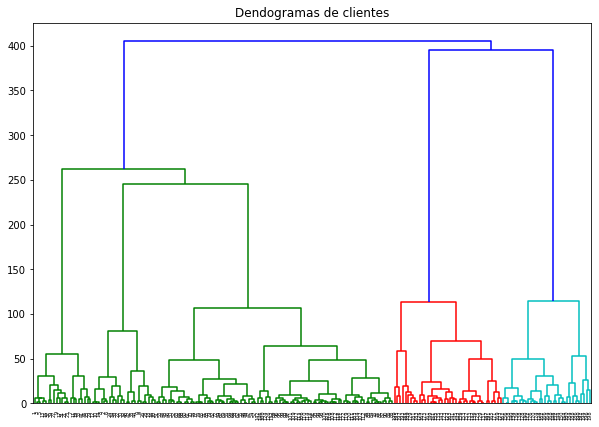

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendogramas de clientes")
cl = shc.linkage(data, method='ward')
dend = shc.dendrogram(cl)

Si dibujamos una línea horizontal que atraviesa la distancia más larga sin una línea horizontal, obtenemos 5 grupos como se muestra en la siguiente figura:

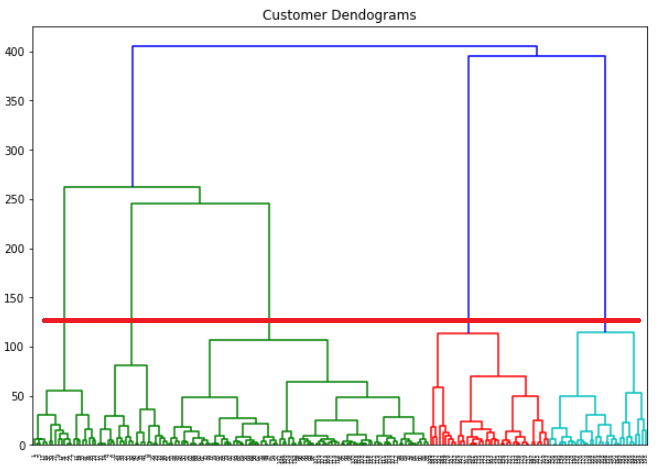

Ahora que sabemos la cantidad de clústeres para nuestro conjunto de datos, el siguiente paso es agrupar las observaciones en estos cinco clústeres. Para hacerlo, usaremos la clase AgglomerativeClustering de la biblioteca sklearn.cluster. 

In [11]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5 , linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

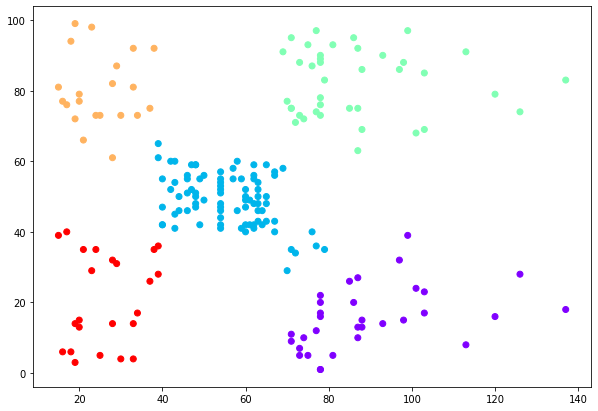

In [12]:
# Graficamos los clusters
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')


Podemos ver los datos agrupados en cinco clusters. Los puntos de datos en la parte inferior derecha pertenecen a los clientes con salarios altos pero gastos bajos. Estos son los clientes que gastan su dinero con cuidado. Del mismo modo, los clientes en la parte superior derecha (puntos de datos verdes), estos son los clientes con altos salarios y altos gastos. Estos son el tipo de clientes a los que se dirigen las empresas. Los clientes en el medio (puntos de datos azules) son los que tienen ingresos medios y salarios medios. El mayor número de clientes pertenece a esta categoría. Las empresas también pueden dirigirse a estos clientes dado que son grandes cantidades, etc.

Revisamos los datos del cluster 2

In [15]:
rows = np.where(cluster.labels_ == 3)
print (data[rows]) 

[[15 81]
 [16 77]
 [17 76]
 [18 94]
 [19 72]
 [19 99]
 [20 77]
 [20 79]
 [21 66]
 [23 98]
 [24 73]
 [25 73]
 [28 82]
 [28 61]
 [29 87]
 [30 73]
 [33 92]
 [33 81]
 [34 73]
 [37 75]
 [38 92]]


### Ejemplo 2 - Tarjetas de crédito

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.preprocessing as pp
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
import scipy.cluster.hierarchy as shc
import nbformat
import matplotlib.pyplot as plt

Leemos el archivo. Se puede descargar de [aquí](https://www.kaggle.com/arjunbhasin2013/ccdata)

In [17]:
raw_data = pd.read_csv("CC_GENERAL.csv")

Exploramos los datos

In [18]:
print(raw_data.shape) # rows and columns
raw_data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Preparación de los datos

In [19]:
# Se completan valores nulos de MINIMUM_PAYMENTS con la media
raw_data['MINIMUM_PAYMENTS'].fillna(value=raw_data['MINIMUM_PAYMENTS'].mean(), inplace = True)

# Se completan valores nulos de CREDIT_LIMIT con la media
raw_data['CREDIT_LIMIT'].fillna(value=raw_data['CREDIT_LIMIT'].mean(), inplace = True)

#Se cuentan los valores nulos
raw_data.isnull().sum().sort_values(ascending=False)

# Se elimina el feature CUST_ID
raw_data = raw_data.drop('CUST_ID', axis = 1) 

Describe del dataset

In [20]:
raw_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [21]:
# Estandarizamos los datos 
# Se transforman los datos tal que la distribución tendrá una media 
# de 0 y desviación estándar de 1
scaler = pp.StandardScaler() 
scaled_df = scaler.fit_transform(raw_data) 
  
# Normalizamos
normalized_df = pp.normalize(scaled_df) 
  
# Convertimos array de Numpy a Dataframe
normalized_df = pd.DataFrame(normalized_df) 

normalized_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000
mean,-0.036517,0.020765,-0.042853,-0.035385,-0.036301,-0.039530,-0.023762,-0.032069,-0.020423,-0.032526,-0.036470,-0.043200,-0.048996,-0.048645,-2.857930e-02,-0.034810,0.032620
std,0.244663,0.295141,0.156043,0.152297,0.184492,0.205965,0.324395,0.281654,0.324835,0.269656,0.203612,0.196881,0.276724,0.176655,1.422041e-01,0.275404,0.245795
min,-0.483286,-0.909587,-0.298688,-0.268728,-0.311007,-0.333097,-0.580187,-0.488511,-0.563468,-0.481928,-0.339723,-0.315757,-0.613080,-0.405245,-2.661731e-01,-0.433600,-0.933146
25%,-0.206007,0.011609,-0.152266,-0.130623,-0.162728,-0.170306,-0.314059,-0.233677,-0.302316,-0.229799,-0.166016,-0.183131,-0.261668,-0.165724,-1.026431e-01,-0.210105,0.073358
50%,-0.110904,0.135002,-0.089667,-0.086978,-0.095260,-0.115147,0.006431,-0.143900,-0.125565,-0.124176,-0.109130,-0.095093,-0.112031,-0.099205,-6.813109e-02,-0.134432,0.114041
75%,0.074168,0.207875,0.015296,-0.002794,0.019878,0.022142,0.277270,0.087703,0.271934,0.106570,0.036543,0.028962,0.144751,0.016484,-1.324866e-16,-0.013585,0.151449
max,0.854700,0.427439,0.603604,0.749526,0.901891,0.865599,0.597942,0.820098,0.684727,0.881966,0.968073,0.961134,0.898725,0.920825,9.918370e-01,0.875101,0.324544


In [23]:
agg_cluster= AgglomerativeClustering(n_clusters=5)
agg_cluster.fit(normalized_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

[-0.31193826  0.21992533  0.12668203 ... -0.1569743  -0.15431961
 -0.11520725]


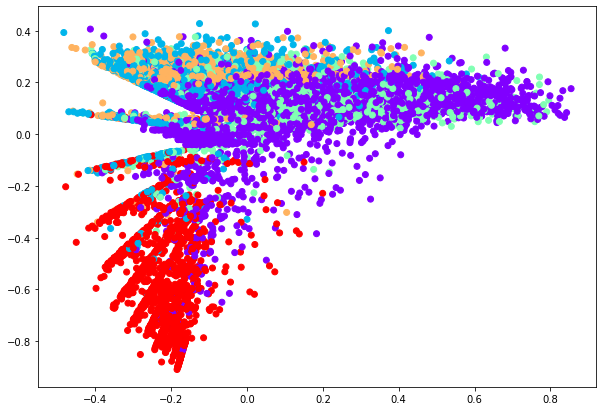

In [24]:
data = normalized_df.iloc[:, 0:17].values
plt.figure(figsize=(10, 7))
print (data[:,0])
plt.scatter(data[:,0], data[:,1], c=agg_cluster.labels_, cmap='rainbow')

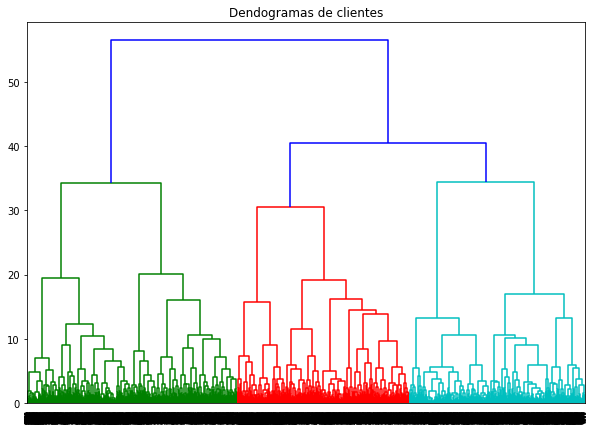

In [25]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendogramas de clientes")
cl = shc.linkage(data, method='ward',)
dend = shc.dendrogram(cl)